<a href="https://colab.research.google.com/github/upal864/ML-Models-New/blob/main/KDAG%20Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Classification Model Using Logistic Regression

Importing necessary libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Fetching and Reading the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/ds1_train.csv')

In [ ]:
df1.head()

,x_1,x_2,y
0,2.911809,60.359613,0.0
1,3.774746,344.149284,0.0
2,2.615488,178.222087,0.0
3,2.013694,15.259472,0.0
4,2.757625,66.194174,0.0


In [ ]:
np.array(df1)

array([[  2.91180854,  60.35961272,   0.        ],
       [  3.77474554, 344.1492843 ,   0.        ],
       [  2.61548828, 178.22208681,   0.        ],
       ...,
       [  2.96909526,  20.24997848,   1.        ],
       [  3.95753102,  27.26196973,   1.        ],
       [  4.02533402,  12.23316511,   1.        ]])

In [ ]:
X_train=np.array([df1['x_1'],df1['x_2']])

In [ ]:
X_train

array([[  2.91180854,   3.77474554,   2.61548828, ...,   2.96909526,
          3.95753102,   4.02533402],
       [ 60.35961272, 344.1492843 , 178.22208681, ...,  20.24997848,
         27.26196973,  12.23316511]])

In [ ]:
Y_train=np.array(df1['y'])

In [ ]:
Y_train

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
X_train = X_train.T


In [ ]:
df2=pd.read_csv('gdrive/My Drive/Colab Notebooks/ds1_test.csv')
df2.head()

,x_1,x_2,y
0,2.177396,78.630076,0.0
1,3.952131,123.541573,0.0
2,3.351176,47.752517,0.0
3,2.074934,26.997730,0.0
4,3.579775,226.703779,0.0


In [ ]:
X_test=np.array([df2['x_1'],df2['x_2']])
Y_test=np.array(df2['y'])

In [ ]:
#X_test=X_test.T


In [ ]:
X_test.shape

(2, 100)

In [ ]:
Y_test.shape

(100,)

In [ ]:
Y_test = Y_test.reshape(1, X_test.shape[1])

In [ ]:
Y_test.shape

(1, 100)

In [ ]:
X_train.shape

(2, 800)

In [ ]:
Y_train.shape

(1, 800)

In [ ]:
Y_train = Y_train.reshape(1, X_train.shape[1])
Y_train.shape

(1, 800)

In [ ]:
m=X_train.shape[1]
n=X_train.shape[0]

Defining the sigmoid function

In [ ]:
def sigmoid(z):
  f=1/(1+np.exp(-z))
  return f

Training of the model

In [ ]:
def cal(X,Y,itr,lr):
  w=np.zeros((n,1))
  b=0

  costl=[]
  for i in range(itr):
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)

    cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
    dW = (1/m)*np.dot(A-Y, X.T)
    dB = (1/m)*np.sum(A - Y)

    w = w - lr*dW.T
    b = b - lr*dB

    costl.append(cost)

    if(i%(itr/10) == 0):
      print("cost after ", i, "iteration is : ", cost)

  return w, b, costl



In [ ]:
iterations = 500000
learning_rate = 0.0015
w, b, cost_list = cal(X_train, Y_train,iterations,learning_rate)

cost after  0 iteration is :  0.6931471805599452
cost after  50000 iteration is :  0.36296453454363486
cost after  100000 iteration is :  0.33848471769825833
cost after  150000 iteration is :  0.330967206963649
cost after  200000 iteration is :  0.3280459512087259
cost after  250000 iteration is :  0.3267681828318613
cost after  300000 iteration is :  0.3261697437749346
cost after  350000 iteration is :  0.3258772098922477
cost after  400000 iteration is :  0.3257301252664436
cost after  450000 iteration is :  0.32565474162660735


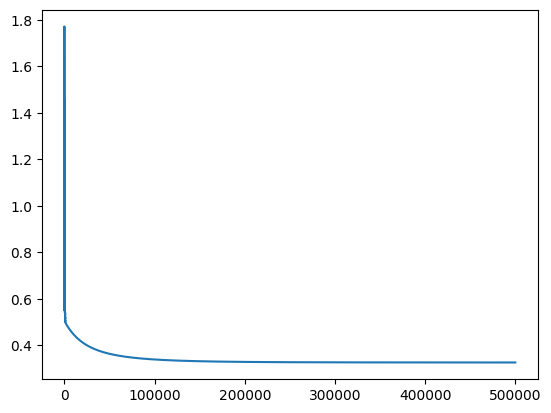

In [ ]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

Calculating the accuracy

In [ ]:
def accuracy(X, Y, W, B):

    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)

    A = A > 0.5

    A = np.array(A, dtype = 'int64')

    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100

    print("Accuracy of the model is : ", round(acc, 2), "%")


In [ ]:
accuracy(X_test, Y_test, w, b)

Accuracy of the model is :  90.0 %


In [ ]:
accuracy(X_train, Y_train, w, b)

Accuracy of the model is :  88.25 %


Logistic Regression Classification in Scikit-Learn

In [ ]:
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression

In [ ]:
sklearn_model = SklearnLogisticRegression()



In [ ]:
Y_train = Y_train.reshape(X_train.shape[1],)
Y_train.shape

(800,)

In [ ]:
sklearn_model.fit(X_train, Y_train)
sklearn_train_accuracy = sklearn_model.score(X_train, Y_train)

In [2]:
#Mathematical Analysis of Logistic Regression Classification

Logistic Regression is a statistical method used for binary classification problems, where the goal is to predict one of two possible outcomes (e.g., 0 or 1, True or False, Yes or No). It's a type of regression analysis, but instead of predicting a continuous value, it predicts the probability that a given input belongs to a particular class.

In its simplest form, the logistic regression model uses the logistic function (also known as the sigmoid function) to model the relationship between the independent variables (features) and the probability of the dependent variable being in a particular class.



The logistic function is defined as
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$


1. Hypothesis Function:
In logistic regression, we start by defining a hypothesis function that predicts the probability of an instance belonging to the positive class (class 1). This function is based on the logistic (sigmoid) function:

$$h_{\theta}(x) = \frac{1}{1 + e^{-\theta^T x}}$$

2. Decision Boundary:
The decision boundary is the line (or hyperplane) that separates the two classes. For binary classification, the decision boundary is where $$h_{\theta}(x) = 0.5$$ , which corresponds to $$\theta^T x = 0$$.This can be generalized to any threshold value by choosing a different value than 0.5.



3. Log-Likelihood:
The goal in logistic regression is to find the optimal set of coefficients
θ that maximizes the likelihood of the observed data given the model. This is done by maximizing the log-likelihood function, which is derived from the likelihood function assuming that the instances are independently and identically distributed:



$$L(\theta) = \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right]$$




4. Gradient Descent:
To maximize the log-likelihood, we can use optimization techniques like gradient descent to iteratively update the coefficients θ in the direction of the gradient of the log-likelihood with respect to θ:$$\theta_j := \theta_j + \alpha \sum_{i=1}^{m} (y^{(i)} - h_{\theta}(x^{(i)})) x_j^{(i)}$$
Where α is the learning rate.



5. Cost Function:
In practice, it's often more convenient to minimize the negative log-likelihood (cross-entropy) as the cost function, which is equivalent to maximizing the likelihood:$$J(\theta) = -\frac{1}{m} L(\theta)$$

7. Prediction:
Once the coefficients are learned, new instances can be classified by plugging them into the hypothesis function and comparing the output with the decision threshold.In summary, logistic regression uses the logistic function to model the probability of classification. The coefficients are learned by maximizing the log-likelihood, often using gradient descent. The decision boundary is determined by the predicted probabilities, and regularization can be applied to control overfitting.